# Неделя 11. Feature Engineering
## Практическая работа

Импортируем библиотеки

In [10]:
import pandas as pd
import numpy as np


from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

from sklearn.decomposition import PCA
from catboost import CatBoostRegressor #необходимо установить
from sklearn.cluster import KMeans

from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE = 42

Загрузим датасет

In [15]:
data_features = ['Start_date', 'Date']
id_features = ['Well_ID', 'id']
state_features = ['VNR','State','state_age']


features = {'date_features' : data_features}

In [17]:
features['date_features']

['Start_date', 'Date']

In [12]:
data = pd.read_csv('contest_train_df.csv', parse_dates = data_features)

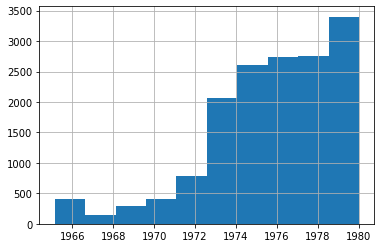

In [13]:
data[data.VNR==1].Date.hist()

In [14]:
#стратегия тестирования

In [ ]:
# Генерация признаков из временных рядов

In [20]:
unique_info = data.groupby('id').apply(lambda x: x.nunique())
unique_info.mean()

Dnytr              0.984637
H_din              6.047497
Q_OIS             18.354500
NomMoschn          1.137370
Hperf              1.009666
NomNapor           1.223659
Water_cut          5.088337
NomPodacha         1.166112
Dnkt               1.141403
H_sp               1.437332
P_plst             1.955255
Hvd                1.001920
Extend_Hvd         1.069069
PlNeft             1.146652
VyazkNeft          1.092306
SumTolshin         0.983165
P_zatr             3.835616
PlVody             1.014787
Pnas               1.179362
Inject_0           4.009410
Inject_1           3.981756
Inject_2           4.063692
Inject_3           3.823070
BHP               29.274997
State              1.996607
IDN_type           1.000000
NalichSep          1.014787
Formation_lbl      1.000000
state_age          1.000000
Date             178.110421
Start_date         1.000000
Well_ID            1.000000
id                 1.000000
VNR                2.000000
dtype: float64

In [71]:
def gen_features(history):
    history_train = history[(history.Date < history.Start_date.values[0]) & (history.State!=0)]
    
    features_dict = dict()
    features_dict['mean_q'] = history_train.Q_OIS.mean()
    features_dict['min_q'] = history_train.Q_OIS.min()
    features_dict['max_q'] = history_train.Q_OIS.max()
    features_dict['std_q'] = history_train.Q_OIS.std()
    
    features_dict['mean_Water_cut'] = history_train.Water_cut.mean()
    
    features_dict['inj_0'] = history_train.Inject_0.mean()
    features_dict['inj_1'] = history_train.Inject_1.mean()
    features_dict['inj_2'] = history_train.Inject_2.mean()
    features_dict['inj_3'] = history_train.Inject_3.mean()
    
    features_dict['targer_q'] = history[history.VNR == 1].Q_OIS.values[0]
    
    return features_dict

In [72]:
features = data.groupby('id').apply(gen_features)

In [73]:
features = pd.DataFrame.from_records(features.values)

In [74]:
features

,mean_q,min_q,max_q,std_q,mean_Water_cut,inj_0,inj_1,inj_2,inj_3,targer_q
0,1128.517241,1114.0,1150.0,14.169790,85.603448,NaN,NaN,NaN,NaN,1104.0
1,418.269006,384.0,428.0,14.376375,77.116959,NaN,NaN,NaN,NaN,450.0
2,418.177215,307.0,431.0,13.837666,80.354430,NaN,NaN,NaN,NaN,304.0
3,1128.247126,1109.0,1152.0,20.449342,80.109195,NaN,NaN,NaN,NaN,1118.0
4,1062.788235,1031.0,1073.0,13.633924,74.894118,NaN,NaN,NaN,NaN,1100.0
...,...,...,...,...,...,...,...,...,...,...
15617,17.125000,7.0,28.0,6.083200,83.604167,NaN,NaN,242.977890,NaN,80.0
15618,48.848485,38.0,55.0,5.391667,90.363636,NaN,369.393411,290.740059,NaN,76.0
15619,53.458333,50.0,56.0,1.570450,78.812500,NaN,286.463929,321.269488,NaN,59.0
15620,28.368421,17.0,45.0,7.298356,66.289474,NaN,106.103382,274.087600,386.898139,43.0


In [ ]:
features.fillna(features.mean(), implace=True)

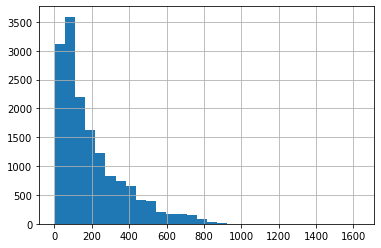

In [46]:
data[data.VNR==1].Q_OIS.hist(bins=30)

In [ ]:
# Логорифмирование target 

(array([1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 9.000e+00, 7.000e+00, 2.000e+01, 5.700e+01, 1.080e+02,
        2.350e+02, 5.040e+02, 7.430e+02, 9.970e+02, 1.408e+03, 1.235e+03,
        1.344e+03, 1.396e+03, 1.289e+03, 1.346e+03, 1.349e+03, 1.134e+03,
        1.094e+03, 7.330e+02, 4.920e+02, 1.030e+02, 1.000e+01, 5.000e+00]),
 array([0.        , 0.24654451, 0.49308902, 0.73963353, 0.98617804,
        1.23272255, 1.47926706, 1.72581157, 1.97235608, 2.21890059,
        2.4654451 , 2.71198961, 2.95853412, 3.20507863, 3.45162314,
        3.69816765, 3.94471216, 4.19125667, 4.43780118, 4.68434569,
        4.9308902 , 5.17743471, 5.42397922, 5.67052373, 5.91706824,
        6.16361274, 6.41015725, 6.65670176, 6.90324627, 7.14979078,
        7.39633529]),
 <a list of 30 Patch objects>)

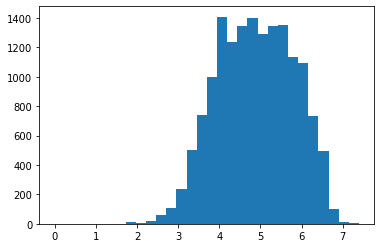

In [48]:
plt.hist(np.log(data[data.VNR==1].Q_OIS), bins=30)

In [75]:
train = features[features['Start_date'] < pd.datetime(1978,1,1)]
test = features[features['Start_date'] >= pd.datetime(1978,1,1)]
train.shape, test.shape

KeyError: 'Start_date'

In [65]:
# sklearn pipline 

In [66]:
model = CatBoostRegressor(random_state=RANDOM_STATE, logging_level = 'Silent')

In [67]:
model.fit(train.drop(['Start_date','target_q'], axis=1), np.log(train.target_q))
preds = model.predict(test.drop(['Start_date', 'target_q'], axis=1))
preds = mp.exp(preds)

KeyError: "['target_q'] not found in axis"

In [68]:
mean_absolute_error(test.target_q, preds)

AttributeError: 'DataFrame' object has no attribute 'target_q'

In [69]:
# cross validation
cross_val_score

NameError: name 'cross_val_score' is not defined

In [70]:
model = CatBoostRegressor(random_state=RANDOM_STATE, logging_level = 'Silent')
cv_preds = cross_val_predict(model, train.drop(['Start_date','target_q'], axis=1), np.log(train.target_q), cv=5)

KeyError: "['target_q'] not found in axis"

In [ ]:
cv_preds = np.exp(cv_preds)

In [63]:
mean_absolute_error(train.target_q, cv_preds)

AttributeError: 'DataFrame' object has no attribute 'target_q'

In [85]:
# pipeline
from sklearn.preprocessing import StandardScaler
StdS = StandardScaler()

In [88]:
pipeline = Pipeline( 
    steps = [('std_scaling',StdS), 
             ('model', CatBoostRegressor(random_state=RANDOM_STATE, logging_level = 'Silent'))])